In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [57]:
df = pd.read_csv('data/실습데이터.csv')
df.head(5)

,Timestamp,OUTPUT_COUNT_DAY_1.xlsx,KO6_MOTOR_SET_FREQ.xlsx,CUTTING_SET_FREQ.xlsx,STATUS.xlsx,KO5_MOTOR_SET_FREQ.xlsx,METAL_OIL_SUPPLY_PRESS_CONTR.xlsx,KO4_MOTOR_SET_FREQ.xlsx,KO2_MOTOR_SET_FREQ.xlsx,MAIN_MOTOR_CURR.xlsx,...,CUTTING_CURR.xlsx,KO5_MOTOR_CURR.xlsx,KO2_MOTOR_CURR.xlsx,KO1_MOTOR_INVERTER_ALM.xlsx,TRANS_POS_DOWN_SET_H.xlsx,OUTPUT_COUNT_DAY_2.xlsx,OUTPUT_COUNT_SUM.xlsx,TRANS_POS_DOWN.xlsx,TRANS_POS_RIGHT.xlsx,MAIN_MOTOR_ALM.xlsx
0,2022-05-02 06:32:33,25878.0,3000.0,3000.0,0.0,3000.0,661.166,3000.0,3000.0,2192.5,...,0.0,0.0,0.0,0.5,2000.0,25881.0,27510.0,1159.5,1741.75,0.0
1,2022-05-02 06:32:34,25878.0,3000.0,3000.0,0.0,3000.0,798.000,3000.0,3000.0,4108.0,...,0.0,0.0,0.0,0.5,2000.0,25881.0,27510.0,1159.5,2322.57,0.0
2,2022-05-02 06:32:35,25878.0,3000.0,3000.0,0.0,3000.0,794.000,3000.0,3000.0,4158.0,...,0.0,0.0,0.0,0.5,2000.0,25881.0,27510.0,1159.5,2322.42,0.0
3,2022-05-02 06:32:36,25878.0,3000.0,3000.0,0.0,3000.0,788.600,3000.0,3000.0,4118.0,...,0.0,0.0,0.0,0.5,2000.0,25881.0,27510.0,1159.5,2322.50,0.0
4,2022-05-02 06:32:37,25878.0,3000.0,3000.0,0.0,3000.0,804.200,3000.0,3000.0,4063.0,...,0.0,0.0,0.0,0.5,2000.0,25881.0,27510.0,1159.5,2322.57,0.0


In [58]:
temp_df = pd.read_csv('data/Temp_Humid_Log.csv', encoding='cp949')
temp_df.head(5)

,지점,지점명,일시,기온(°C),기온 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C)
0,105,강릉,2022-05-02 00:00,10.4,NaN,71,NaN,8.9,5.3
1,105,강릉,2022-05-02 01:00,9.4,NaN,74,NaN,8.7,4.9
2,105,강릉,2022-05-02 02:00,9.0,NaN,74,NaN,8.5,4.6
3,105,강릉,2022-05-02 03:00,9.1,NaN,68,NaN,7.8,3.4
4,105,강릉,2022-05-02 04:00,9.0,NaN,66,NaN,7.5,2.9


In [59]:
print("df의 컬럼: ", df.columns)
print("temp_df: ", temp_df.columns)

df의 컬럼:  Index(['Timestamp', 'OUTPUT_COUNT_DAY_1.xlsx', 'KO6_MOTOR_SET_FREQ.xlsx',
       'CUTTING_SET_FREQ.xlsx', 'STATUS.xlsx', 'KO5_MOTOR_SET_FREQ.xlsx',
       'METAL_OIL_SUPPLY_PRESS_CONTR.xlsx', 'KO4_MOTOR_SET_FREQ.xlsx',
       'KO2_MOTOR_SET_FREQ.xlsx', 'MAIN_MOTOR_CURR.xlsx',
       'KO3_MOTOR_SET_FREQ.xlsx', 'TRANS_POS_UP_SET_H.xlsx',
       'TRANS_POS_RIGHT_SET_L.xlsx', 'TONGS_INVERTER_ALM_ERR_CD.xlsx',
       'KO1_MOTOR_SET_FREQ.xlsx', 'KO3_MOTOR_INVERTER_ALM.xlsx',
       'MAIN_MOTOR_RPM.xlsx', 'TRANS_CURR.xlsx', 'KO1_MOTOR_CURR.xlsx',
       'TRANS_INVERTER_ALM_ERR_CD.xlsx', 'TONGS_CAST_SET_FREQ.xlsx',
       'TRANS_POS_LEFT_SET_H.xlsx', 'KO4_MOTOR_INVERTER_ALM.xlsx',
       'TRANS_POS_DOWN_SET_L.xlsx', 'KO6_MOTOR_CURR.xlsx',
       'OIL_SUPPLY_PRESS.xlsx', 'KO2_MOTOR_INVERTER_ALM.xlsx',
       'KO3_MOTOR_CURR.xlsx', 'TRANS_POS_UP.xlsx', 'TONGS_POS.xlsx',
       'WORK_OIL_SUPPLY_PRESS.xlsx', 'METAL_TEMP_CONTROL.xlsx',
       'TONGS_CAST_CURR.xlsx', 'CUTTING_INVERTER_ALM_E

In [60]:
 temp_df.info()
 ## 기온 QC플래그 열에서 NaN이 아닌 값을 출력하고 싶어
 temp_df[temp_df['기온 QC플래그'].notnull()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지점         2808 non-null   int64  
 1   지점명        2808 non-null   object 
 2   일시         2808 non-null   object 
 3   기온(°C)     2808 non-null   float64
 4   기온 QC플래그   0 non-null      float64
 5   습도(%)      2808 non-null   int64  
 6   습도 QC플래그   0 non-null      float64
 7   증기압(hPa)   2808 non-null   float64
 8   이슬점온도(°C)  2808 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 197.6+ KB


,지점,지점명,일시,기온(°C),기온 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C)


In [61]:
temp_df.columns

Index(['지점', '지점명', '일시', '기온(°C)', '기온 QC플래그', '습도(%)', '습도 QC플래그',
       '증기압(hPa)', '이슬점온도(°C)'],
      dtype='object')

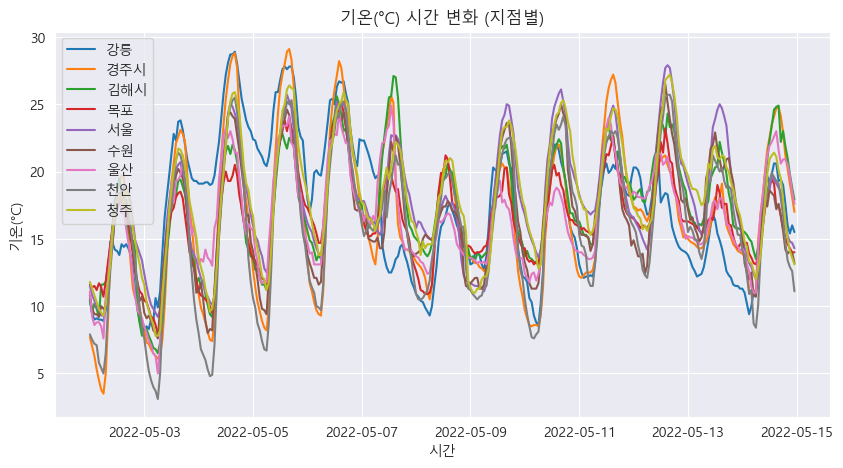

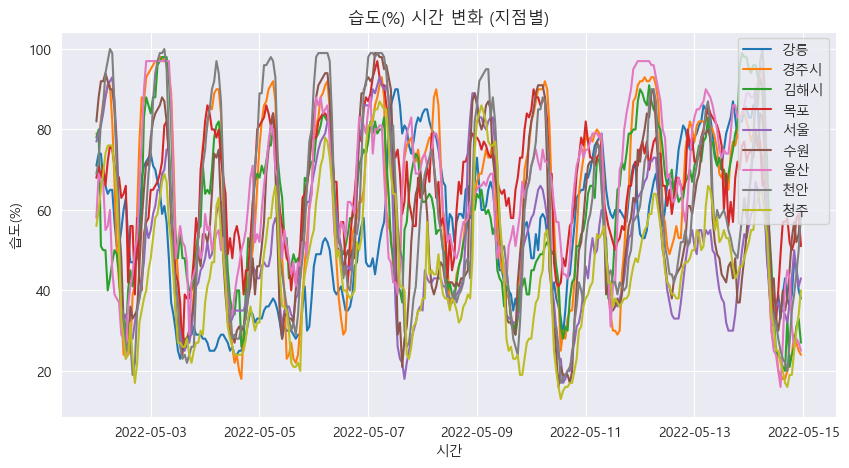

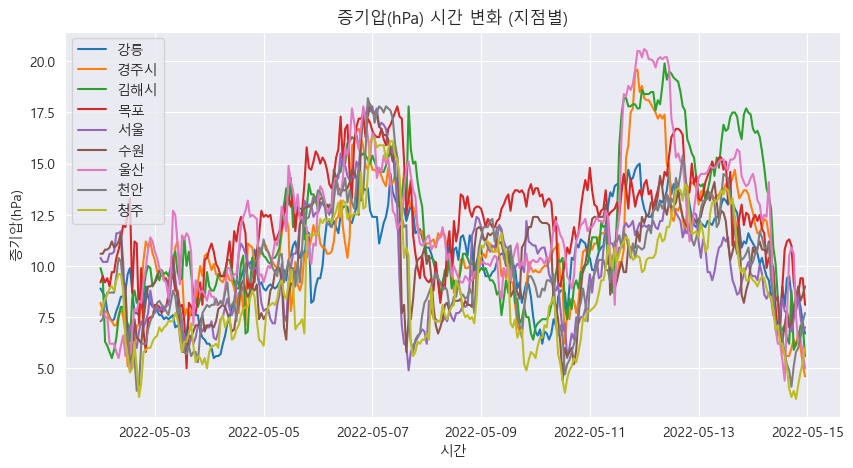

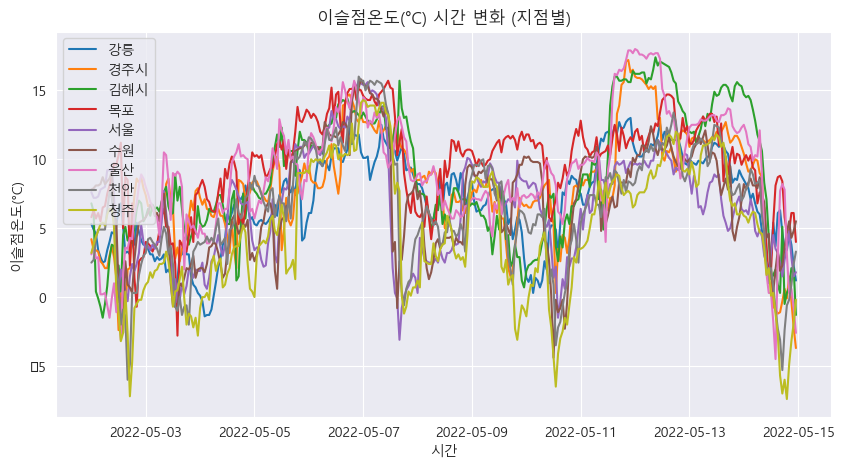

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# 시간 컬럼 datetime 변환
temp_df['일시'] = pd.to_datetime(temp_df['일시'])

# QC 플래그는 무시, 필요 없는 컬럼 제거
temp_df = temp_df[['지점명', '일시', '기온(°C)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)']]

# 그래프 그릴 변수 목록
variables = ["기온(°C)", "습도(%)", "증기압(hPa)", "이슬점온도(°C)"]

# 지점별 선그래프
for var in variables:
    plt.figure(figsize=(10, 5))
    for site, group in temp_df.groupby('지점명'):
        plt.plot(group["일시"], group[var], label=site)
    plt.title(f"{var} 시간 변화 (지점별)")
    plt.xlabel("시간")
    plt.ylabel(var)
    plt.legend()
    plt.grid(True)
    plt.show()


In [63]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# 1. df를 1시간 단위로 집계
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_hourly = df.set_index('Timestamp').resample('1H').agg({
    'MAIN_MOTOR_CURR.xlsx': 'mean',
    'OIL_SUPPLY_PRESS.xlsx': 'mean',
    'MAIN_AIR_PRESS.xlsx': 'mean',
    'METAL_TEMP_CONTROL.xlsx': 'mean',
    'OUTPUT_COUNT_SUM.xlsx': 'max'  # 누적값은 최대값
})

# 2. temp_df 준비
temp_df['일시'] = pd.to_datetime(temp_df['일시'])

# 3. 각 지점별로 상관관계 분석
results = []

for location in temp_df['지점명'].unique():
    location_weather = temp_df[temp_df['지점명'] == location].copy()
    location_weather = location_weather.set_index('일시')

    # 시간대 매칭
    merged = df_hourly.join(location_weather[['기온(°C)', '습도(%)', '증기압(hPa)']],
                            how='inner')

    if len(merged) < 24:  # 최소 24시간 이상 데이터 필요
        continue

    # 여러 변수와 기온/습도의 상관관계 계산
    correlations = {}

    # 유압, 공기압 등은 온도/습도 영향을 받을 수 있음
    for col in ['MAIN_MOTOR_CURR.xlsx', 'OIL_SUPPLY_PRESS.xlsx',
                'MAIN_AIR_PRESS.xlsx', 'METAL_TEMP_CONTROL.xlsx']:
        if col in merged.columns and merged[col].notna().sum() > 0:
            # 기온과의 상관관계
            corr_temp, _ = spearmanr(merged[col].dropna(),
                                     merged.loc[merged[col].notna(), '기온(°C)'])
            correlations[f'{col}_temp'] = abs(corr_temp)

            # 습도와의 상관관계
            corr_humid, _ = spearmanr(merged[col].dropna(),
                                      merged.loc[merged[col].notna(), '습도(%)'])
            correlations[f'{col}_humid'] = abs(corr_humid)

    # 평균 상관계수
    avg_corr = np.mean(list(correlations.values())) if correlations else 0

    results.append({
        '지점명': location,
        '데이터 포인트': len(merged),
        '평균_상관계수': avg_corr,
        '상세_상관관계': correlations
    })

# 결과 정리
results_df = pd.DataFrame(results).sort_values('평균_상관계수', ascending=False)
print(results_df[['지점명', '데이터 포인트', '평균_상관계수']])

   지점명  데이터 포인트   평균_상관계수
2   수원      287  0.248572
1   서울      287  0.239525
6   천안      287  0.235829
7  김해시      287  0.227742
4   울산      287  0.191402
3   청주      287  0.191237
5   목포      287  0.181605
8  경주시      287  0.180751
0   강릉      287  0.126422


In [68]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# 1. df를 1시간 단위로 집계
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_hourly = df.set_index('Timestamp').resample('1H').agg({
    'MAIN_MOTOR_CURR.xlsx': 'mean',
    'OIL_SUPPLY_PRESS.xlsx': 'mean',
    'MAIN_AIR_PRESS.xlsx': 'mean',
    'METAL_TEMP_CONTROL.xlsx': 'mean',
    'OUTPUT_COUNT_SUM.xlsx': 'max'  # 누적값은 최대값
})

# 2. temp_df 준비
temp_df['일시'] = pd.to_datetime(temp_df['일시'])

# 3. 각 지점별로 상관관계 분석
results = []

for location in temp_df['지점명'].unique():
    location_weather = temp_df[temp_df['지점명'] == location].copy()
    location_weather = location_weather.set_index('일시')

    # 시간대 매칭
    merged = df_hourly.join(location_weather[['기온(°C)', '습도(%)', '증기압(hPa)']],
                            how='inner')

    if len(merged) < 24:  # 최소 24시간 이상 데이터 필요
        continue

    # 여러 변수와 기온/습도의 상관관계 계산
    corr_temp_list = []
    corr_humid_list = []

    for col in ['MAIN_MOTOR_CURR.xlsx', 'OIL_SUPPLY_PRESS.xlsx',
                'MAIN_AIR_PRESS.xlsx', 'METAL_TEMP_CONTROL.xlsx']:
        if col in merged.columns and merged[col].notna().sum() > 0:
            # 기온과의 상관관계
            corr_temp, _ = spearmanr(merged[col].dropna(),
                                     merged.loc[merged[col].notna(), '기온(°C)'])
            corr_temp_list.append(abs(corr_temp))

            # 습도와의 상관관계
            corr_humid, _ = spearmanr(merged[col].dropna(),
                                      merged.loc[merged[col].notna(), '습도(%)'])
            corr_humid_list.append(abs(corr_humid))

    # 평균 상관계수 계산
    avg_corr_temp = np.mean(corr_temp_list) if corr_temp_list else 0
    avg_corr_humid = np.mean(corr_humid_list) if corr_humid_list else 0
    avg_corr_overall = np.mean(corr_temp_list + corr_humid_list) if (corr_temp_list + corr_humid_list) else 0

    results.append({
        '지점명': location,
        '데이터 포인트': len(merged),
        '평균_상관계수_기온': avg_corr_temp,
        '평균_상관계수_습도': avg_corr_humid,
        '평균_상관계수_전체': avg_corr_overall
    })

# 결과 정리
results_df = pd.DataFrame(results).sort_values('평균_상관계수_전체', ascending=False)
print(results_df)

   지점명  데이터 포인트  평균_상관계수_기온  평균_상관계수_습도  평균_상관계수_전체
2   수원      287    0.234488    0.262657    0.248572
1   서울      287    0.241990    0.237060    0.239525
6   천안      287    0.213618    0.258039    0.235829
7  김해시      287    0.221632    0.233853    0.227742
4   울산      287    0.150778    0.232026    0.191402
3   청주      287    0.198494    0.183981    0.191237
5   목포      287    0.147945    0.215266    0.181605
8  경주시      287    0.150534    0.210968    0.180751
0   강릉      287    0.130230    0.122614    0.126422


In [66]:
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import StandardScaler

# 일별 기온 변화 패턴 비교
def daily_pattern_similarity(df_data, weather_data):
    """하루 중 시간대별 변화 패턴 유사도"""
    # df의 일별 평균 패턴
    df_data = df_data.copy()
    df_data['hour'] = df_data.index.hour
    df_pattern = df_data.groupby('hour')['MAIN_MOTOR_CURR.xlsx'].mean()

    # 기상 데이터의 일별 패턴
    weather_data = weather_data.copy()
    weather_data['hour'] = weather_data.index.hour
    weather_pattern = weather_data.groupby('hour')['기온(°C)'].mean()

    # NaN 제거
    df_pattern = df_pattern.dropna()
    weather_pattern = weather_pattern.dropna()

    # 공통 시간대만 사용
    common_hours = df_pattern.index.intersection(weather_pattern.index)

    if len(common_hours) < 12:  # 최소 12시간 이상 필요
        return np.inf

    df_pattern = df_pattern.loc[common_hours]
    weather_pattern = weather_pattern.loc[common_hours]

    # 정규화
    scaler = StandardScaler()
    df_norm = scaler.fit_transform(df_pattern.values.reshape(-1, 1)).flatten()
    weather_norm = scaler.fit_transform(weather_pattern.values.reshape(-1, 1)).flatten()

    # inf나 nan 확인
    if np.any(~np.isfinite(df_norm)) or np.any(~np.isfinite(weather_norm)):
        return np.inf

    # 유클리드 거리 (작을수록 유사)
    distance = euclidean(df_norm, weather_norm)
    return distance

# 각 지점별로 계산
pattern_results = []

for location in temp_df['지점명'].unique():
    try:
        location_weather = temp_df[temp_df['지점명'] == location].copy()
        location_weather = location_weather.set_index('일시')

        merged = df_hourly.join(location_weather[['기온(°C)']], how='inner')

        if len(merged) >= 24:
            similarity = daily_pattern_similarity(merged, merged)

            # 유효한 결과만 추가
            if np.isfinite(similarity):
                pattern_results.append({
                    '지점명': location,
                    '패턴_유사도': similarity,
                    '데이터_포인트': len(merged)
                })
                print(f"{location}: 유사도 = {similarity:.3f}, 데이터 포인트 = {len(merged)}")
    except Exception as e:
        print(f"{location} 처리 중 오류: {str(e)}")
        continue

if pattern_results:
    pattern_df = pd.DataFrame(pattern_results).sort_values('패턴_유사도')
    print("\n=== 시간대별 패턴 유사도 결과 (낮을수록 유사) ===")
    print(pattern_df)
else:
    print("패턴 유사도를 계산할 수 있는 지점이 없습니다.")

강릉: 유사도 = 8.408, 데이터 포인트 = 287
서울: 유사도 = 8.590, 데이터 포인트 = 287
수원: 유사도 = 8.519, 데이터 포인트 = 287
청주: 유사도 = 8.539, 데이터 포인트 = 287
울산: 유사도 = 8.540, 데이터 포인트 = 287
목포: 유사도 = 8.599, 데이터 포인트 = 287
천안: 유사도 = 8.497, 데이터 포인트 = 287
김해시: 유사도 = 8.600, 데이터 포인트 = 287
경주시: 유사도 = 8.622, 데이터 포인트 = 287

=== 시간대별 패턴 유사도 결과 (낮을수록 유사) ===
   지점명    패턴_유사도  데이터_포인트
0   강릉  8.408188      287
6   천안  8.497089      287
2   수원  8.518605      287
3   청주  8.538794      287
4   울산  8.539974      287
1   서울  8.590126      287
5   목포  8.599323      287
7  김해시  8.600349      287
8  경주시  8.621787      287


In [67]:
# 방법 2-B: 단순 통계 비교
print("=== 각 지점별 기온 통계 ===")
weather_stats = temp_df.groupby('지점명').agg({
    '기온(°C)': ['mean', 'std', 'min', 'max'],
    '습도(%)': ['mean', 'std']
}).round(2)

print(weather_stats)

# METAL_TEMP_CONTROL 값이 있다면 간접 비교
if 'METAL_TEMP_CONTROL.xlsx' in df_hourly.columns:
    print("\n=== 설비 온도 제어 통계 ===")
    print(df_hourly['METAL_TEMP_CONTROL.xlsx'].describe())

    # 각 지점과 설비 데이터 기간 비교
    print("\n=== 시간대 매칭 확인 ===")
    for location in temp_df['지점명'].unique():
        location_weather = temp_df[temp_df['지점명'] == location].copy()
        location_weather = location_weather.set_index('일시')

        merged = df_hourly.join(location_weather[['기온(°C)']], how='inner')
        print(f"{location}: {len(merged)}개 시간대 매칭")

=== 각 지점별 기온 통계 ===
    기온(°C)                   습도(%)       
      mean   std  min   max   mean    std
지점명                                      
강릉   17.24  5.08  8.3  28.9  54.95  18.59
경주시  16.54  5.61  3.5  29.1  62.54  23.01
김해시  17.29  4.16  6.5  27.1  60.56  18.47
목포   16.37  3.35  7.9  25.1  66.43  13.68
서울   17.88  4.33  9.2  27.9  50.73  18.10
수원   16.68  4.30  7.6  26.5  57.34  21.28
울산   16.45  3.88  5.0  24.9  64.77  18.66
천안   15.86  5.35  3.1  25.7  59.47  23.68
청주   18.04  4.39  7.8  27.2  45.25  17.38

=== 설비 온도 제어 통계 ===
count    178.000000
mean      37.552651
std        5.784740
min       17.397444
25%       34.304868
50%       38.877260
75%       42.000000
max       45.000000
Name: METAL_TEMP_CONTROL.xlsx, dtype: float64

=== 시간대 매칭 확인 ===
강릉: 287개 시간대 매칭
서울: 287개 시간대 매칭
수원: 287개 시간대 매칭
청주: 287개 시간대 매칭
울산: 287개 시간대 매칭
목포: 287개 시간대 매칭
천안: 287개 시간대 매칭
김해시: 287개 시간대 매칭
경주시: 287개 시간대 매칭


In [65]:
# 데이터 기간 확인
print("=== 데이터 기간 비교 ===")
print(f"df 기간: {df['Timestamp'].min()} ~ {df['Timestamp'].max()}")
print(f"temp_df 기간: {temp_df['일시'].min()} ~ {temp_df['일시'].max()}")

print("\n=== temp_df 지점 목록 ===")
print(temp_df[['지점', '지점명']].drop_duplicates())

# 데이터 통계 비교
print("\n=== 기온 통계 (각 지점) ===")
print(temp_df.groupby('지점명')['기온(°C)'].describe())

=== 데이터 기간 비교 ===
df 기간: 2022-05-02 06:32:33 ~ 2022-05-14 04:34:46
temp_df 기간: 2022-05-02 00:00:00 ~ 2022-05-14 23:00:00

=== temp_df 지점 목록 ===


KeyError: "['지점'] not in index"

---

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 시간 매핑 (3초 단위 df + 1시간 단위 temp_df)
df.rename(columns={'Timestamp': '일시'}, inplace=True)

# df는 이미 datetime이니까 변환 불필요
df["일시"] = pd.to_datetime(df["일시"], errors="coerce")

# temp_df를 확실히 datetime으로 변환
temp_df["일시"] = pd.to_datetime(temp_df["일시"], errors="coerce")

df = df.sort_values("일시")
temp_df = temp_df.sort_values("일시")
merged_list = []

for site, group in temp_df.groupby("지점명"):
    merged = pd.merge_asof(
        df,
        group,
        on="일시",
        direction="backward",
        tolerance=pd.Timedelta("1H")
    )
    merged["지점명"] = site
    merged_list.append(merged)

merged_all = pd.concat(merged_list, ignore_index=True)

# 2. 상관관계 계산
target_vars = ["기온(°C)", "습도(%)", "증기압(hPa)", "이슬점온도(°C)"]
corr_results = {}

for site, group in merged_all.groupby("지점명"):
    corr = group.corr(numeric_only=True)
    if "target" in corr.columns:
        corr_results[site] = corr.loc["target", target_vars]

corr_df = pd.DataFrame(corr_results).T   # 지역 × 기상요소

# 3. 순위점수 계산 (평균 절댓값 상관계수)
corr_df["순위점수"] = corr_df.abs().mean(axis=1)
ranked = corr_df.sort_values("순위점수", ascending=False)

# 결과 확인
print("지역별 상관관계:")
print(ranked)

# 4. Heatmap 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(ranked[target_vars], annot=True, cmap="coolwarm", center=0)
plt.title("지역별 target과 기상요소 상관관계")
plt.show()

# 5. 순위점수 Barplot 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=ranked.index, y=ranked["순위점수"], palette="viridis")
plt.xticks(rotation=45)
plt.title("지역별 상관관계 순위점수 (평균 |corr|)")
plt.ylabel("순위점수 (평균 절댓값 상관계수)")
plt.show()


KeyError: 'timestamp컬럼명'

In [47]:
target_vars = ["기온(°C)", "습도(%)", "증기압(hPa)", "이슬점온도(°C)"]
corr_results = {}

for site, group in merged_all.groupby("지점명"):
    corr = group.corr(numeric_only=True)
    if "target" in corr.columns:  # df의 분석 대상 변수명 (예: 'target')
        corr_results[site] = corr.loc["target", target_vars]

corr_df = pd.DataFrame(corr_results).T
print(corr_df)


Empty DataFrame
Columns: []
Index: []


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# df를 1시간 단위로 리샘플링 (temp_df와 동일한 시간 단위로)
df_hourly = df.resample('1H', on='Timestamp').mean()

# 만약 df에 온도/습도 센서 데이터가 있다면
if 'temperature' in df.columns:
    # temp_df의 각 지역과 상관관계 계산
    correlations = {}
    for region in temp_df['지점명'].unique():
        region_data = temp_df[temp_df['지'] == region]

        # 시간 인덱스 매칭
        merged = pd.merge(df_hourly, region_data,
                         left_index=True, right_on='시간컬럼', how='inner')

        if len(merged) > 0:
            corr, _ = pearsonr(merged['df의온도'], merged['temp_df의온도'])
            correlations[region] = corr

    # 상관관계가 가장 높은 지역
    best_match = max(correlations, key=correlations.get)
    print(f"가장 유사한 지역: {best_match}")
    print(f"상관계수: {correlations[best_match]:.3f}")